In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Convolution

In [3]:
sess = tf.InteractiveSession()

In [4]:
image = np.array([[[[1], [2], [3]],
                   [[4], [5], [6]],
                   [[7], [8], [9]]]], dtype=np.float32)

In [5]:
print(image.shape)

(1, 3, 3, 1)


input image expression 순서<br/>
image - (width, height, channel)

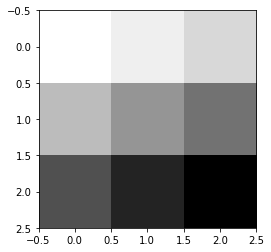

In [11]:
plt.imshow(image.reshape(3,3), cmap='Greys')
plt.show()

filter expressin 순서<br/>
(width, height, input_channel, filter_num)

In [14]:
print("image shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight shape", weight.shape)

image shape (1, 3, 3, 1)
weight shape (2, 2, 1, 1)


In [22]:
#zero padding
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2d_img= conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img.shape (1, 2, 2, 3)


padding: same => input output shape을 동일하게 한다.

In [21]:
#padding
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img= conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img.shape (1, 3, 3, 3)


In [20]:
#필터 3개
print("image shape", image.shape)
weight = tf.constant([[[[1., 10., -1.]],[[1., 10., -1.]]],
                      [[[1., 10., -1.]],[[1., 10., -1.]]]])
print("weight shape", weight.shape)

image shape (1, 3, 3, 1)
weight shape (2, 2, 1, 3)


In [24]:
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img= conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img.shape (1, 3, 3, 3)


### 2. Max pooling

In [25]:
image = np.array([[[[1], [2], [3]],
                   [[4], [5], [6]],
                   [[7], [8], [9]]]], dtype=np.float32)

In [26]:
print(image.shape)

(1, 3, 3, 1)


In [33]:
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                             strides=[1,1,1,1], padding='VALID')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[ 5.]
   [ 6.]]

  [[ 8.]
   [ 9.]]]]


padding expression 순서<br/>
(in_channel, padding_width, padding_height, out_channel)

### 3. MNIST

In [34]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


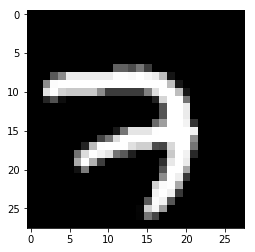

In [36]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

#### 3-1. Convolution 

In [49]:
sess = tf.InteractiveSession()

#데이터 정의
img = img.reshape(-1, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3,3,1,5], stddev=0.01))

#stride 줌
conv2d = tf.nn.conv2d(img, W1, strides=[1,2,2,1], padding='SAME')
print(conv2d)

Tensor("Conv2D_11:0", shape=(1, 14, 14, 5), dtype=float32)


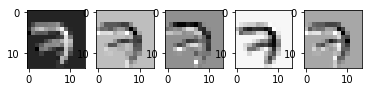

In [50]:
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

#### 3-2. Max pooling

Tensor("MaxPool_13:0", shape=(1, 7, 7, 5), dtype=float32)


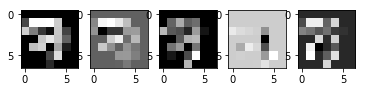

In [52]:
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(pool)

sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)

for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7,7), cmap='gray')

### 4. MNIST

In [83]:
tf.reset_default_graph()

In [84]:
#1. 데이터 정의
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

#LAYER 1
#filter
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))
#filter - (3,3,1,32)

#layer - convolution
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME')
#output - (-1, 28, 28, 32)

#layer - activation
L1 = tf.nn.relu(L1)
#output - (-1, 28, 28, 32)

#layer - max_pool
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
#output - (-1, 14, 14, 32)


#LAYER 2
#filter
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.1))
#filter - (3,3,32,64)

#layer - convolution
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME')
#output - (-1, 14, 14, 64)

#layer - activation
L2 = tf.nn.relu(L2)
#output - (-1, 14, 14, 64)

#layer - max_pool
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
#output - (-1, 7, 7, 64)

#layer - flatten
L2 = tf.reshape(L2, [-1, 7*7*64])


#LAYER 3
#fully connected layer
W3 = tf.get_variable("W3", shape=[7*7*64,10], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))

In [85]:
#2. Hypothesis
hypothesis = tf.matmul(L2, W3) + b

In [86]:
#3. cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))

In [87]:
#4. optimizer
learning_rate = 0.01
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [88]:
#5. evaluate
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuarcy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [89]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 64

In [ ]:
#6. train
print("Learning Started.")
for epoch in range(training_epoch):
    
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _, = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    print("Epoch: ", '%04d' %(epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
print("Learning Finished!")

Learning Started.
Epoch:  0001 cost = 0.128393357
Epoch:  0002 cost = 0.055660189
Epoch:  0003 cost = 0.041472500


In [ ]:
#7.test
print("Accuracy: ", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))